<a href="https://colab.research.google.com/github/ampeck-coding/Data-Exploration/blob/main/Programming_Languages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [ ]:
df = pd.read_csv('QueryResultsNew.csv', names=['DATE', 'TAG', 'POSTS'], header=0)


**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [ ]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [ ]:
df.tail()

,DATE,TAG,POSTS
2351,2022-09-01 00:00:00,php,4091
2352,2022-09-01 00:00:00,python,22759
2353,2022-09-01 00:00:00,r,4256
2354,2022-09-01 00:00:00,ruby,503
2355,2022-09-01 00:00:00,swift,1968


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [ ]:
df.shape

(2356, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [ ]:
df.count()


DATE     2356
TAG      2356
POSTS    2356
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [ ]:
df.groupby('TAG').sum()


,POSTS
TAG,
assembly,41194
c,385659
c#,1559978
c++,776995
delphi,50098
go,64657
java,1866365
javascript,2427623
perl,67145


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [ ]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,170,170
c,170,170
c#,171,171
c++,170,170
delphi,170,170
go,155,155
java,170,170
javascript,170,170
perl,170,170


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [ ]:
# Convert Entire Column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


## Data Manipulation



In [ ]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,159.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [ ]:
reshaped_df.shape

(171, 14)

In [ ]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [ ]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1647.0,753.0,104.0,NaN,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1149.0,724.0,127.0,612.0,508.0,NaN,247.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,582.0,97.0,501.0,451.0,1.0,159.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [ ]:
reshaped_df.count()

TAG
assembly      170
c             170
c#            171
c++           170
delphi        170
go            155
java          170
javascript    170
perl          170
php           170
python        170
r             168
ruby          170
swift         162
dtype: int64

In [ ]:
reshaped_df.fillna(0, inplace=True)
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,83.0,506.0,164.0,14.0,0.0,222.0,164.0,28.0,159.0,120.0,0.0,70.0,0.0
2008-09-01,28.0,318.0,1647.0,753.0,104.0,0.0,1133.0,636.0,130.0,477.0,537.0,6.0,287.0,0.0
2008-10-01,15.0,303.0,1989.0,809.0,112.0,0.0,1149.0,724.0,127.0,612.0,508.0,0.0,247.0,0.0
2008-11-01,17.0,259.0,1732.0,734.0,141.0,0.0,957.0,582.0,97.0,501.0,451.0,1.0,159.0,0.0


In [ ]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

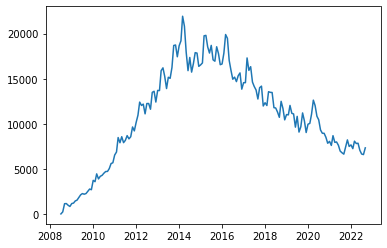

In [ ]:
plt.plot(reshaped_df.index, reshaped_df.java)

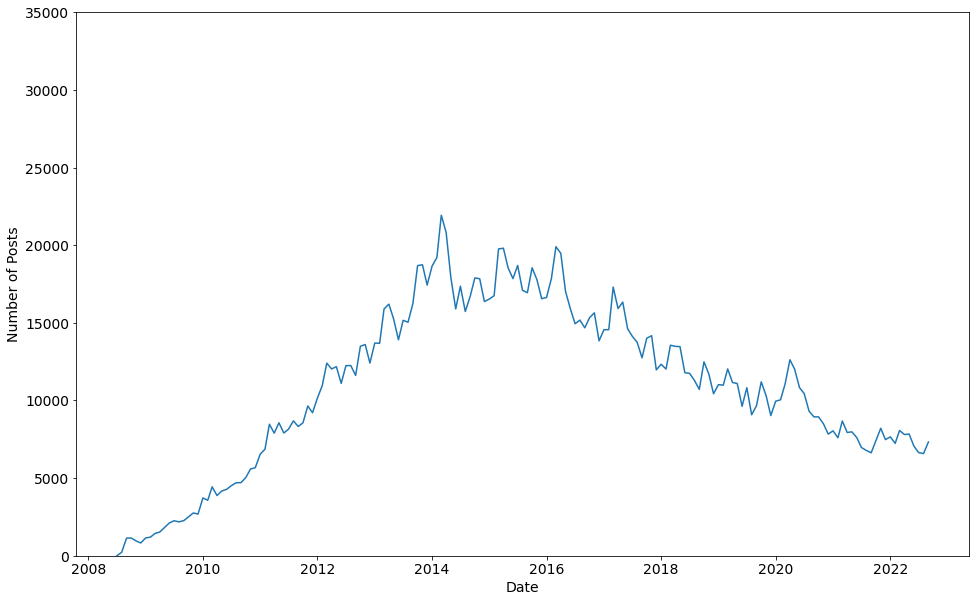

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.java)


**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

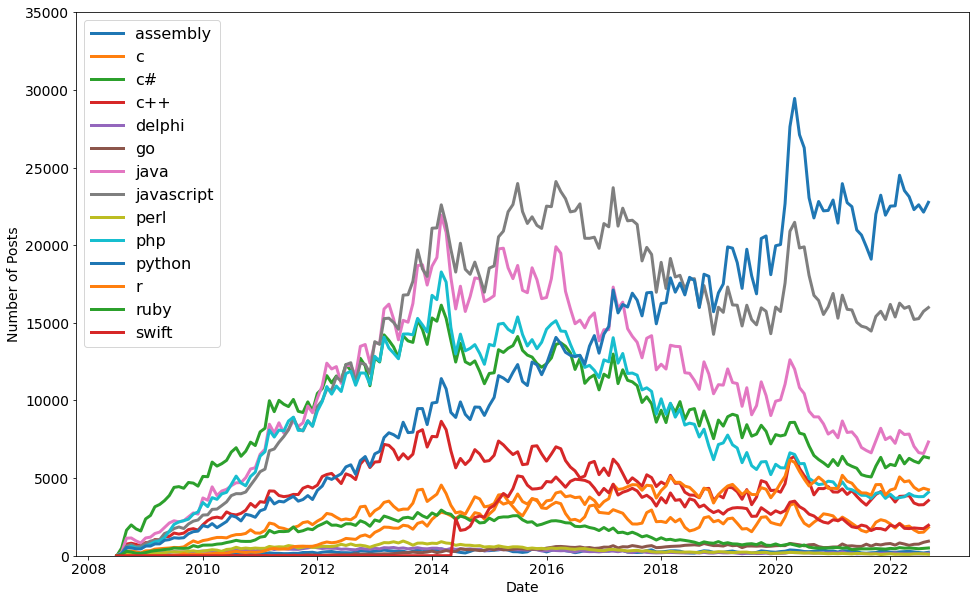

In [ ]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
# plt.plot(reshaped_df.index, reshaped_df.java)
# plt.plot(reshaped_df.index, reshaped_df.python)
for column in reshaped_df.columns:
  plt.plot(reshaped_df.index, reshaped_df[column],
           linewidth=3, label=reshaped_df[column].name)
  
plt.legend(fontsize=16)


# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

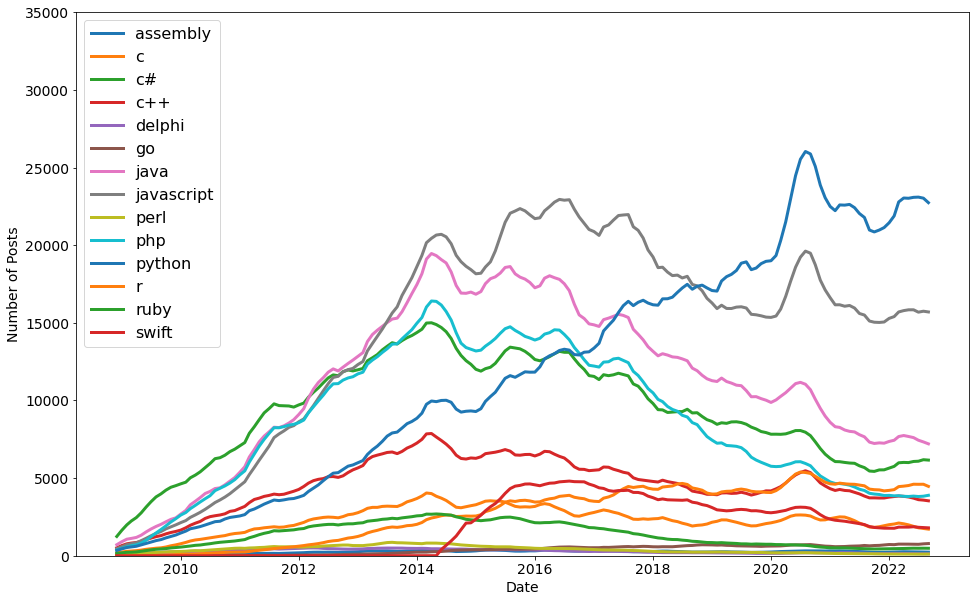

In [ ]:
# The windows is n umber of observations that are averaged
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
  plt.plot(roll_df.index, roll_df[column],
           linewidth=3, label=roll_df[column].name)
  
plt.legend(fontsize=16)